## Introduction, Exploratory Analysis
Data Science is a hyped job in recent times. This notebook contains an analysis of job posts in Data Science in 2019 in the US to go in deeper to what is actually required to land such a job. 

To see the visualizations, press the play button on each cell to advance. Being able to pin-point where and the amount of available jobs can give a better understanding of the state of the job market.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px

This dataset is rather small, collected by scraping data from different job boards/platforms for US in the year 2019 (from Feb 2019 to October 2019).

In [4]:
usa_jobs = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')
usa_jobs.dataframeName = 'data_scientist_united_states_job_postings_jobspikr.csv'
nRow, nCol = usa_jobs.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 22 columns


Let's take a quick look at what the data looks like and see the first and last dates of the posts:

In [6]:
usa_jobs.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [7]:
usa_jobs['crawl_timestamp'] = pd.to_datetime(usa_jobs['crawl_timestamp'])
#Finding earliest and latest posting
print(f"Earliest job post in the set: {min(usa_jobs['crawl_timestamp'])}")
print(f"Latest post in the set: {max(usa_jobs['crawl_timestamp'])}")

Earliest job post in the set: 2019-02-06 05:26:22+00:00
Latest post in the set: 2019-10-01 06:18:27+00:00


Observing the demand of various hard skills and programming languages. Each time a word is mentioned in the job description, its values in the dictionary are incremented.


In [13]:
requirements = {"powerbi":0, " r ":0, "tableau":0, "qlikview":0, "python":0, "sql":0, "machine learning":0,'linux':0, 'c#':0, \
" ml ":0, "hive":0, "spark":0, "hadoop":0, "java":0, "scala":0, "kafka":0, "bachelor":0, "master":0, "phd":0, 'year':0, 'years':0, "c++":0}
for i in range(len(usa_jobs)):
    job_description = usa_jobs.job_description[i].lower().replace("\n", " ")
    for k in requirements:
        if k in job_description:
            requirements[k] += 1
#print(requirements['machine learning'])
#print(requirements[' ml '])
requirements['machine learning'] += requirements[' ml ']
requirements['year'] += requirements['years']
requirements['years experience'] = requirements.pop('year')
del requirements['years']
del requirements[' ml ']

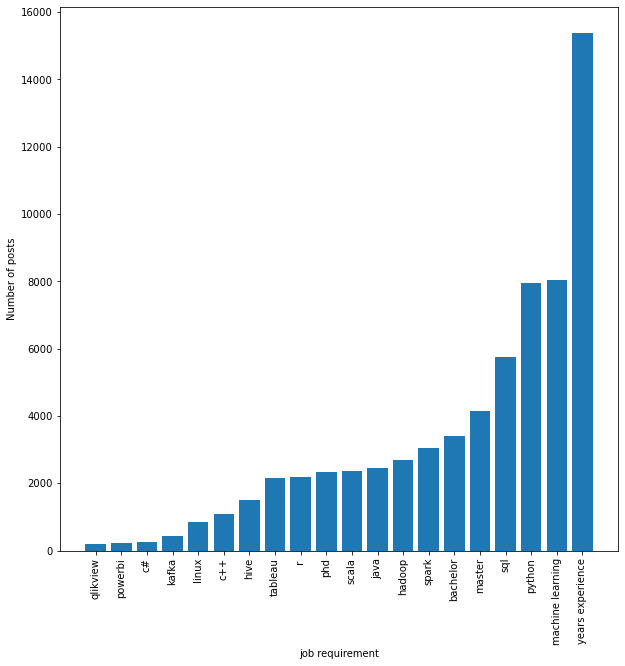

In [14]:
from collections import OrderedDict
sorted_req = OrderedDict(sorted(requirements.items(), key=lambda x:x[1]))
plt.figure(figsize=(10, 10))
plt.bar(range(len(sorted_req)),data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnEAAAKaCAYAAABRDg95AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAABGgklEQVR4nO3deZhkZX328e/NIqKCiAxEWRxE1CDuA0FBxR2DgjsYo4hGlBDFGBeIibiEV9yjvhHFFVzAETcUEREVRFEcFmWTVxQiE1BGRSQqIPB7/zinnZqmu6eHOae6z8z3c11zddVTVed5Cmaq73rWVBWSJEkalnXmugGSJEladYY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRqg9ea6AeO22Wab1cKFC+e6GZIkSSt19tln/7qqFkz1WG8hLslHgScDV1fVjiPlLwP+CbgJOLGqXtOWHwq8CLgZeHlVndyWPxT4OLAh8FXg4KqqJBsAxwAPBX4D7FNVl6+sXQsXLmTJkiVdvU1JkqTeJPnv6R7rczj148AekxryaGBv4AFVdT/gHW35DsC+wP3a17w/ybrty44EDgC2b/9MXPNFwDVVdS/g3cBbe3wvkiRJ80pvIa6qTgd+O6n4QOCIqrqhfc7VbfnewHFVdUNVXQZcCuyc5G7AxlV1ZjVHSxwDPHXkNUe3t48HHpskfb0fSZKk+WTcCxvuDTwiyQ+SnJZkp7Z8S+CKkectbcu2bG9PLl/hNVV1E3AtcNce2y5JkjRvjHthw3rAXYBdgJ2AxUnuCUzVg1YzlLOSx1aQ5ACaIVm22WabVWyyJEnS/DPunrilwOercRZwC7BZW771yPO2Aq5sy7eaopzR1yRZD7gztx6+BaCqjqqqRVW1aMGCKRd4SJIkDcq4Q9wXgccAJLk3cDvg18AJwL5JNkiyLc0ChrOq6irguiS7tPPdng98qb3WCcB+7e1nAt9s581JkiSt8frcYuRYYHdgsyRLgcOAjwIfTXIBcCOwXxu8LkyyGLiIZuuRg6rq5vZSB7J8i5GT2j8AHwE+keRSmh64fft6L5IkSfNN1rbOq0WLFpX7xEmSpCFIcnZVLZrqMY/dkiRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA7TeXDdAkiSpbwsPObHza15+xJ6dX3NV2BMnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkAeotxCX5aJKrk1wwxWOvSlJJNhspOzTJpUkuSfLEkfKHJjm/fey9SdKWb5DkM235D5Is7Ou9SJIkzTd99sR9HNhjcmGSrYHHA78YKdsB2Be4X/ua9ydZt334SOAAYPv2z8Q1XwRcU1X3At4NvLWXdyFJkjQP9Rbiqup04LdTPPRu4DVAjZTtDRxXVTdU1WXApcDOSe4GbFxVZ1ZVAccATx15zdHt7eOBx0700kmSJK3pxjonLslewP9U1Y8mPbQlcMXI/aVt2Zbt7cnlK7ymqm4CrgXuOk29ByRZkmTJsmXLVvt9SJIkzbWxhbgkdwBeB7x+qoenKKsZymd6za0Lq46qqkVVtWjBggWzaa4kSdK8Ns6euO2AbYEfJbkc2Ao4J8lf0fSwbT3y3K2AK9vyraYoZ/Q1SdYD7szUw7eSJElrnLGFuKo6v6o2r6qFVbWQJoQ9pKp+CZwA7NuuON2WZgHDWVV1FXBdkl3a+W7PB77UXvIEYL/29jOBb7bz5iRJktZ4fW4xcixwJnCfJEuTvGi651bVhcBi4CLga8BBVXVz+/CBwIdpFjv8DDipLf8IcNcklwKvBA7p5Y1IkiTNQ+v1deGqes5KHl846f7hwOFTPG8JsOMU5dcDz1q9VkqSJA2TJzZIkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgHoLcUk+muTqJBeMlL09yU+S/DjJF5JsMvLYoUkuTXJJkieOlD80yfntY+9NkrZ8gySfact/kGRhX+9FkiRpvumzJ+7jwB6Tyk4BdqyqBwD/DzgUIMkOwL7A/drXvD/Juu1rjgQOALZv/0xc80XANVV1L+DdwFt7eyeSJEnzTG8hrqpOB347qezrVXVTe/f7wFbt7b2B46rqhqq6DLgU2DnJ3YCNq+rMqirgGOCpI685ur19PPDYiV46SZKkNd1czol7IXBSe3tL4IqRx5a2ZVu2tyeXr/CaNhheC9y1x/ZKkiTNG3MS4pK8DrgJ+NRE0RRPqxnKZ3rNVPUdkGRJkiXLli1b1eZKkiTNO2MPcUn2A54MPLcdIoWmh23rkadtBVzZlm81RfkKr0myHnBnJg3fTqiqo6pqUVUtWrBgQVdvRZIkac6MNcQl2QN4LbBXVf1x5KETgH3bFafb0ixgOKuqrgKuS7JLO9/t+cCXRl6zX3v7mcA3R0KhJEnSGm29vi6c5Fhgd2CzJEuBw2hWo24AnNKuQfh+Vb20qi5Mshi4iGaY9aCqurm91IE0K103pJlDNzGP7iPAJ5JcStMDt29f70WSJGm+6S3EVdVzpij+yAzPPxw4fIryJcCOU5RfDzxrddooSZI0VJ7YIEmSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAHqLcQl+WiSq5NcMFK2aZJTkvy0/XmXkccOTXJpkkuSPHGk/KFJzm8fe2+StOUbJPlMW/6DJAv7ei+SJEnzTZ89cR8H9phUdghwalVtD5za3ifJDsC+wP3a17w/ybrta44EDgC2b/9MXPNFwDVVdS/g3cBbe3snkiRJ80xvIa6qTgd+O6l4b+Do9vbRwFNHyo+rqhuq6jLgUmDnJHcDNq6qM6uqgGMmvWbiWscDj53opZMkSVrTjXtO3BZVdRVA+3PztnxL4IqR5y1ty7Zsb08uX+E1VXUTcC1w195aLkmSNI/Ml4UNU/Wg1QzlM73m1hdPDkiyJMmSZcuW3cYmSpIkzR/jDnG/aodIaX9e3ZYvBbYeed5WwJVt+VZTlK/wmiTrAXfm1sO3AFTVUVW1qKoWLViwoKO3IkmSNHfGHeJOAPZrb+8HfGmkfN92xem2NAsYzmqHXK9Lsks73+35k14zca1nAt9s581JkiSt8dbr68JJjgV2BzZLshQ4DDgCWJzkRcAvgGcBVNWFSRYDFwE3AQdV1c3tpQ6kWem6IXBS+wfgI8AnklxK0wO3b1/vRZIkab7pLcRV1XOmeeix0zz/cODwKcqXADtOUX49bQiUJEla28yXhQ2SJElaBYY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYBWGuKSvC3JxknWT3Jqkl8n+ftxNE6SJElTm01P3BOq6vfAk4GlwL2BV/faKkmSJM1oNiFu/fbn3wLHVtVve2yPJEmSZmG9WTzny0l+AvwJ+MckC4Dr+22WJEmSZjKbnrjDgIcBi6rqz8Afgb16bZUkSZJmNJsQd2ZVXVNVNwNU1R+Ak/ptliRJkmYy7XBqkr8CtgQ2TPJgIO1DGwN3GEPbJEmSNI2Z5sQ9EXgBsBXwrpHy64B/7bFNkiRJWolpQ1xVHQ0cneQZVfW5MbZJkiRJKzGbOXFbtZv9JsmHk5yT5Am9t0ySJEnTmk2Ie2G72e8TgM2B/YEjem2VJEmSZjSbEDexoOFvgY9V1Y9GyiRJkjQHZhPizk7ydZoQd3KSjYBb+m2WJEmSZjKbExteBDwI+HlV/THJXWmGVCVJkjRHVhriquqWJFsBf5cE4LSq+nLvLZMkSdK0VjqcmuQI4GDgovbPy5O8pe+GSZIkaXqzGU79W+BBVXULQJKjgXOBQ/tsmCRJkqY3m4UNAJuM3L5zD+2QJEnSKphNT9xbgHOTfItma5FHYi+cJEnSnJrNwoZjk3wb2Kktem1V/bLXVkmSJGlGs+mJA3gYsBtQwLrAF3prkSRJklZqNqtT3w+8FDgfuAB4SZL/6rthkiRJmt5seuIeBexYVQV/WZ16fq+tkiRJ0oxmszr1EmCbkftbAz/upzmSJEmajdn0xN0VuDjJWe39nYAzk5wAUFV79dU4SZIkTW02Ie71vbdCkiRJq2Q2W4ycNo6GSJIkafZme2KDJEmS5hFDnCRJ0gBNG+KSnNr+fOv4miNJkqTZmGlO3N2SPArYK8lxNOem/kVVndNryyRJkjStmULc64FDgK2Ad016rIDH9NUoSZIkzWzaEFdVxwPHJ/n3qnrzGNskSZKklZjNFiNvTrIX8Mi26NtV9ZV+myVJkqSZrHR1apK3AAcDF7V/Dm7LJEmSNEdmc2LDnsCDquoWgCRHA+cCh/bZMEmSJE1vtvvEbTJy+849tEOSJEmrYDY9cW8Bzk3yLZptRh6JvXCSJElzajYLG45N8m1gJ5oQ99qq+mXfDZMkSdL0ZjWcWlVXVdUJVfWlLgJckn9OcmGSC5Icm+T2STZNckqSn7Y/7zLy/EOTXJrkkiRPHCl/aJLz28femyRT1yhJkrRmGfvZqUm2BF4OLKqqHYF1gX1pNhY+taq2B05t75Nkh/bx+wF7AO9Psm57uSOBA4Dt2z97jPGtSJIkzZnZzInrq94Nk/wZuANwJc08u93bx48Gvg28FtgbOK6qbgAuS3IpsHOSy4GNq+pMgCTHAE8FThrbu5AkSatt4SEndnq9y4/Ys9PrzVcz9sQlWSfJBV1WWFX/A7wD+AVwFXBtVX0d2KKqrmqfcxWwefuSLYErRi6xtC3bsr09uXyq93FAkiVJlixbtqzLtyNJkjQnZgxx7d5wP0qyTVcVtnPd9ga2Be4O3DHJ38/0kqmaNkP5rQurjqqqRVW1aMGCBavaZEmSpHlnNsOpdwMuTHIW8IeJwqra6zbW+TjgsqpaBpDk88DDgV8luVtVXZXkbsDV7fOXAluPvH4rmuHXpe3tyeWSJKkDDnPOb7MJcW/suM5fALskuQPwJ+CxwBKagLgfcET780vt808APp3kXTQ9d9sDZ1XVzUmuS7IL8APg+cD7Om6rJEnSvDSbfeJOS3IPYPuq+kYbvtZd2etmuN4PkhwPnAPcRHOE11HAnYDFSV5EE/Se1T7/wiSLac5tvQk4qKpubi93IPBxYEOaBQ0uapAkSWuFlYa4JC+m2cZjU2A7msUDH6DpQbtNquow4LBJxTdMd82qOhw4fIryJcCOt7UdkiRJQzWbfeIOAnYFfg9QVT9l+cpRSZIkzYHZhLgbqurGiTtJ1mOaVaCSJEkaj9mEuNOS/CvN5ryPBz4LfLnfZkmSJGkmswlxhwDLgPOBlwBfBf6tz0ZJkiRpZrNZnXpLkqNptvEo4JKqcjhVkiRpDs1mdeqeNKtRf0ZzSsK2SV5SVW7nIUmSNEdms9nvO4FHV9WlAEm2A07EPdkkSZLmzGzmxF09EeBaP2f5kViSJEmaA9P2xCV5envzwiRfBRbTzIl7FvDDMbRNkiRJ05hpOPUpI7d/BTyqvb0MuEtvLZIkSdJKTRviqmr/cTZEkiRJszeb1anbAi8DFo4+v6r26q9ZkiRJmslsVqd+EfgIzSkNt/TaGkmSJM3KbELc9VX13t5bIkmSpFmbTYh7T5LDgK8DN0wUVtU5vbVKkiRJM5pNiLs/8DzgMSwfTq32viRJkubAbELc04B7VtWNfTdGkiRJszObExt+BGzSczskSZK0CmbTE7cF8JMkP2TFOXFuMSJJkjRHZhPiDuu9FZIkSVolKw1xVXXaOBoiSZKk2ZvNiQ3X0axGBbgdsD7wh6rauM+GSZIkaXqz6YnbaPR+kqcCO/fVIEmSJK3cbFanrqCqvoh7xEmSJM2p2QynPn3k7jrAIpYPr0qSJGkOzGZ16lNGbt8EXA7s3UtrJEmSNCuzmRO3/zgaIkmSpNmbNsQlef0Mr6uqenMP7ZEkSdIszNQT94cpyu4IvAi4K2CIkyRJmiPThriqeufE7SQbAQcD+wPHAe+c7nWSJEnq34xz4pJsCrwSeC5wNPCQqrpmHA2TJEnS9GaaE/d24OnAUcD9q+p/x9YqSZIkzWimzX7/Bbg78G/AlUl+3/65Lsnvx9M8SZIkTWWmOXGrfJqDJEmSxsOgJkmSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBmhOQlySTZIcn+QnSS5O8rAkmyY5JclP2593GXn+oUkuTXJJkieOlD80yfntY+9Nkrl4P5IkSeM2Vz1x7wG+VlX3BR4IXAwcApxaVdsDp7b3SbIDsC9wP2AP4P1J1m2vcyRwALB9+2ePcb4JSZKkuTL2EJdkY+CRwEcAqurGqvodsDdwdPu0o4Gntrf3Bo6rqhuq6jLgUmDnJHcDNq6qM6uqgGNGXiNJkrRGm4ueuHsCy4CPJTk3yYeT3BHYoqquAmh/bt4+f0vgipHXL23LtmxvTy6XJEla481FiFsPeAhwZFU9GPgD7dDpNKaa51YzlN/6AskBSZYkWbJs2bJVba8kSdK8MxchbimwtKp+0N4/nibU/aodIqX9efXI87ceef1WwJVt+VZTlN9KVR1VVYuqatGCBQs6eyOSJElzZewhrqp+CVyR5D5t0WOBi4ATgP3asv2AL7W3TwD2TbJBkm1pFjCc1Q65Xpdkl3ZV6vNHXiNJkrRGW2+O6n0Z8KkktwN+DuxPEygXJ3kR8AvgWQBVdWGSxTRB7ybgoKq6ub3OgcDHgQ2Bk9o/kiRJa7w5CXFVdR6waIqHHjvN8w8HDp+ifAmwY6eNkyRJGgBPbJAkSRogQ5wkSdIAGeIkSZIGaK4WNkiSpNto4SEndn7Ny4/Ys/Nrql/2xEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSAK031w2QJGlNsvCQEzu93uVH7Nnp9bTmmLOeuCTrJjk3yVfa+5smOSXJT9ufdxl57qFJLk1ySZInjpQ/NMn57WPvTZK5eC+SJEnjNpfDqQcDF4/cPwQ4taq2B05t75NkB2Bf4H7AHsD7k6zbvuZI4ABg+/bPHuNpuiRJ0tyakxCXZCtgT+DDI8V7A0e3t48GnjpSflxV3VBVlwGXAjsnuRuwcVWdWVUFHDPyGkmSpDXaXPXE/SfwGuCWkbItquoqgPbn5m35lsAVI89b2pZt2d6eXC5JkrTGG3uIS/Jk4OqqOnu2L5mirGYon6rOA5IsSbJk2bJls6xWkiRp/pqLnrhdgb2SXA4cBzwmySeBX7VDpLQ/r26fvxTYeuT1WwFXtuVbTVF+K1V1VFUtqqpFCxYs6PK9SJIkzYmxh7iqOrSqtqqqhTQLFr5ZVX8PnADs1z5tP+BL7e0TgH2TbJBkW5oFDGe1Q67XJdmlXZX6/JHXSJIkrdHm0z5xRwCLk7wI+AXwLICqujDJYuAi4CbgoKq6uX3NgcDHgQ2Bk9o/kiRJa7w5DXFV9W3g2+3t3wCPneZ5hwOHT1G+BNixvxZKkiTNTx67JUmSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSAK031w2QJGkcFh5yYufXvPyIPTu/pjRb9sRJkiQNkCFOkiRpgAxxkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIECdJkjRAhjhJkqQBMsRJkiQNkCFOkiRpgAxxkiRJA+TZqZKkOeWZptJtY0+cJEnSABniJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsgQJ0mSNECenSpJmlbX55p6pqnUHXviJEmSBsgQJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIPeJk6QB6nr/NnAPN2lo7ImTJEkaIEOcJEnSADmcKkkd86gqSeNgiJO01nAemaQ1icOpkiRJA2SIkyRJGiBDnCRJ0gAZ4iRJkgbIhQ2S5pwLDiRp1RniJM3I7TIkaX4a+3Bqkq2TfCvJxUkuTHJwW75pklOS/LT9eZeR1xya5NIklyR54kj5Q5Oc3z723iQZ9/uRJEmaC3MxJ+4m4F+q6q+BXYCDkuwAHAKcWlXbA6e292kf2xe4H7AH8P4k67bXOhI4ANi+/bPHON+IJEnSXBl7iKuqq6rqnPb2dcDFwJbA3sDR7dOOBp7a3t4bOK6qbqiqy4BLgZ2T3A3YuKrOrKoCjhl5jSRJ0hptTlenJlkIPBj4AbBFVV0FTdADNm+ftiVwxcjLlrZlW7a3J5dLkiSt8eYsxCW5E/A54BVV9fuZnjpFWc1QPlVdByRZkmTJsmXLVr2xkiRJ88ychLgk69MEuE9V1efb4l+1Q6S0P69uy5cCW4+8fCvgyrZ8qynKb6WqjqqqRVW1aMGCBd29EUmSpDkyF6tTA3wEuLiq3jXy0AnAfu3t/YAvjZTvm2SDJNvSLGA4qx1yvS7JLu01nz/yGkmSpDXaXOwTtyvwPOD8JOe1Zf8KHAEsTvIi4BfAswCq6sIki4GLaFa2HlRVN7evOxD4OLAhcFL7R5IkaY039hBXVWcw9Xw2gMdO85rDgcOnKF8C7Nhd6yRJkobBs1MlSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDdB6c90ASbfNwkNO7Pyalx+xZ+fXlCT1w544SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRqg9ea6AdKaaOEhJ3Z6vcuP2LPT60mShs+eOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaIEOcJEnSABniJEmSBsh94rRWcf82SdKawp44SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyBAnSZI0QIY4SZKkATLESZIkDZAhTpIkaYAMcZIkSQNkiJMkSRqg9ea6ARLAwkNO7Pyalx+xZ+fXlCRpvrAnTpIkaYAMcZIkSQNkiJMkSRogQ5wkSdIAGeIkSZIGyNWpWqmuV466alSSpNVniBswt+WQJGntZYjrgeFKkiT1zTlxkiRJA2SIkyRJGqDBh7gkeyS5JMmlSQ6Z6/ZIkiSNw6BDXJJ1gf8CngTsADwnyQ5z2ypJkqT+DTrEATsDl1bVz6vqRuA4YO85bpMkSVLvhh7itgSuGLm/tC2TJElao6Wq5roNt1mSZwFPrKp/aO8/D9i5ql426XkHAAe0d+8DXDLWhs5sM+DXa0Ada1o9vpe1u5416b2Mqx7fy9pdj++lP/eoqgVTPTD0feKWAluP3N8KuHLyk6rqKOCocTVqVSRZUlWLhl7HmlaP72XtrmdNei/jqsf3snbX43uZG0MfTv0hsH2SbZPcDtgXOGGO2yRJktS7QffEVdVNSf4JOBlYF/hoVV04x82SJEnq3aBDHEBVfRX46ly3YzWMY5h3XEPJa1I9vpe1u5416b2Mqx7fy9pdj+9lDgx6YYMkSdLaauhz4iRJktZKhjhJkqQBGvycOEnSrSXZHLj9xP2q+sUcNuc2S7JpVf12Utm2VXVZh3WsAzyzqhZ3dc1p6gmwVVVdsdInC4AkT5+i+Frg/Kq6usN6dgO2r6qPJVkA3KnLv2N9cU7cmCV5IfCdqvrpXLdldSXZrKrGsiFikrsA27PiL6XTO67jE8A/VdW17f170Kx4fmyX9bTXvl+fK6mT3AH4F2Cbqnpxku2B+1TVV/qqc6iSbDrT45MDxHyXZC/gncDdgauBewAXV9X9eqrv6cBuQAFnVNUXOr7+d4EnVdXv2/s7AIuraseO6zm9qh7Z5TWnqefsqnpoT9d+H83/hylV1cv7qLdPSU4EHgZ8qy3aHfg+cG/gTVX1iQ7qOAxYRPMZee8kdwc+W1W7ru61+2ZP3PgtBP6+DQhnA9+hCXXndXHxJIur6tlJzmfFf8wBqqoe0EEd61TVLcDXgYe0ZQdX1XtW99rT1PcPwME0mzmfB+wCnAk8puOqzgB+kOSVNMe3vZomCPXhE7T/7XryMZq/Xw9r7y8FPgt0FuKSXMYUvzCq6p4d1rEOsEtVfa+ra07hbJr3EWAb4Jr29ibAL4Btu6ooyS7A+4C/Bm5HszXSH6pq467qAN5M82/kG1X14CSPBp7T4fX/Isn7gXsBx7ZFL0nyuKo6qMNq/g/w5SR70py4cwzw3A6vP+GUJK8CPgP8YaKwhxD//SQ7VdUPO74uwJIerjmtJLsCb6D5orAey3/PdPYZANwC/HVV/aqtcwvgSOBvgNNpPktX19OABwPnAFTVlUk26uC6vTPEjVlVvR4gyYbAi2mCwn/SfJh34eD255M7ut5UTkvyB+CvkuwB/BjYD+glxNG8p52A71fVo5PcF3hj15VU1QeTXEjzje/XwIOr6pdd19NKT9edsF1V7ZPkOQBV9ad2KKdLozua3x54FjBjr9aqqqpbkryT5WG0c1W1LUCSDwAntNsWkeRJwOM6ru7/0mxK/lma/37PpwlBXfpzVf0myTrtF65vJXlrx3VMeBSwY7VDOkmOBs7vsoKqOjHJ+jRfGjcCntrTSMYL25+jAbSALgMJwKOBlya5nCYsdvYFu6qOXt1rrKKPAP9M80Xo5p7qWDgR4FpXA/euqt8m+XNHddxYVZVk4u/xHTu6bu8McWOW5N+AXYE7AecCr6LpjetEVV3V/vzvJH8F7EzzQfTDrgJJVT0iySY0/3B3Bv4BuHeS44DTqurILuoZcX1VXZ+EJBtU1U+S3KfjOibO3v13ml+sDwC+mmT/qvpRR9c/jOU9Plskef3EY1X1pi7qGHFj+0Vh4kNpO+CGLiuoqt9MKvrPJGcAr5/q+avh60meAXx+Iiz0ZKeqeunEnao6Kcmbu66kqi5Nsm5V3Qx8LEnXvYy/S3Inml6KTyW5Grip4zomXELTe/nf7f2tab7UrbYphgY3Bn4OvCxJ50ODE2F+DJ7UdwVJvszMw6p7dVTVtVV1UkfXms53knyF5osPwDOA09ug9buO6lic5IPAJkleTBPoP9TRtXtliBu/p9N8oJ4InEbTu3R915W0Q5CvB75JExrel+RNVfXRDq79dZrhzFuA91XVNUnOBV4D9DGnZGkbGr9IM+RxDVOckduBZwC7tZNlj03yBeBo4EEdXf/ykdt/Zvkvvj68AfgasHWST9F8cXhBlxUkGR0OXoemZ6mPIYhXAncEbkpyPct7LrocggT4dfsl65M0vwD/HpgcVFfXH9sjAs9L8jbgKpr31qW9gT/R9JA8F7gz0PWXhAl3BS5OclZ7fyfgzCQnwGqHhclDg2evxrVWqu3tO5Dln2HfBj5YVV319gB/+YJ9q0n0XdZBE3b/iubvMjTD6ZfTnG7UpW8leTvweUa+JFbVOR3WcRDNZ/OuNP/2jwE+136he3QXFVTVO5I8Hvg9zZD966vqlC6u3TcXNsyBdqx9t/bPs4FfVdVuHddxCfDwid6SJHcFvldVq92D1U6afxjNB8QSYAuaIaE308zv621eRpJH0fxSOqnrD9dp6rtdVd3Yw3XPqao+58RN/D/fheaD7/tdL0JJ8q2RuzfR/JJ4R1Vd0mU949IucDiM5b/ETwfe2OWcqHYu7NXA+jQh687A+6vq0g7r+GeaSdlLu7rmDHU9aqbHq+q01bz+usDRVfX3q3OdWdb1YZr/LxNDks8Dbq6qf+i4nt4n0U+1SKOPhRuTPgMmVFV1PV+5V0m2Ba6a6FBpRzG2qKrL57Rhs2BP3Jgl2RF4BM1ckkXAFXQ4nDpiKXDdyP3r2rpWW1X9ETg1yS+r6ikA7UKKK2jmxnUa4toexNe3dZ/WfrB3Prk5yXS9lC+cpny1quvhmssv3vSEHEszx+sPK3v+bVFVnXwLni/asHbwSp+4enVM9L7+iR7mdbY2Bk5O8lvgOOD4SXOKOtP+e9yCpgcO4KzqcNuHqro5yYK+vkxNslNVPXDk/jeTdDKVYpJxTKJfkOSeVfVzgCT3BBZ0XMdYPgPSrH5+K7A5zedmHz3xnwUePnL/5rZsp6mfPn8Y4sbvrTTf8N9LM0+t096kdmUlwP/QrLT8Es3Q0N7AWdO+8LZ5xsjtM6rqeOD4jusA2CbJoVX1liQb0Pzj6rK7fsKJI7dvT/Nh28ewLUDn25ZM8k5gH+CIdqjrM8BXuh66b1cM3o8Vt37pa+iuV0nuTTNHdSEjn41d9Crk1qvFV9DFpPaRa70ReGOSB9D8HTgtydKq6nqRBkmeDbydZuhxYtrGq9vPgq5cDny3/WIyumr0XR3WAXBzku2q6mfwl+DTx2T9cUyifwXw7SQ/p/l7ty1wQNeVJLkzK/Zen0az7ce1HVbzNuApVXVxh9ecbL3RLwlVdWM77WHeM8SNWVXt2XbVbtPTcODEN7qftX8mfKmHug5Ls7XI76rqwDR7ub2zqrruudqfZoL2oTRzIE6qqnd3XAdV9bnR+0mOBb7RdT1tXb3uPdYOY030Wj6GZiX0R2l6aTqRZjXnHWj+n3wYeCbdf1EYp88CH6B5L13/8u5ztfh0rgZ+STOvb/Oe6ngdTQ/W1QDt/K5v0O2XuSvbP+vQz5zLCa+mmeP1c5pAeg+az56uTTWJ/sMd17ExsCNNeNuLppepjz09PwpcQDMtCJoh6I/RzP3uyq96DnAAy5LsVVUnACTZm37+e3XOOXFjluQpwDuA21XVtkkeRPPNpavVQhPzSI6oqld3dc1p6jm3qh68srLVuP7onLH1gQ8C36VZ1t715Nmp6r8PcGJVdb0FBEk+V1XPWPkzV6uODYGn0PTGPISmJ+5lHV7/x1X1gJGfd6JZQfqEruoYp/S4Ces4JTmQ5v/5Apow9Zmquqinus6vqvuP3F8H+NFo2ZC0Pf33oQlxP6mqTld0j9TzeOAJbT0ndz2JfuTf5G40++y9E/jXqvqbjus5r6oetLKy1azjPTSLNL7IiosnPt9hHdsBn6LZIDs0U4Oe3+Vc1b7YEzd+b6DZluPbAFV1XpKFXVbQziPpddJ8a50kd6mqa+AvE8O7/Dv1zkn3rwF2aMuLjjf7TXIdy7cAKZpejNd2WceIrveeWkGSz9Bshvk14L+Ab1ezQXOX/tT+/GM7Ofs3dLgx7rhk+YkNX05yELdeadflwoZxbPZ7D+AV1dEG4ivxtSQns3yz332Ar3ZZQdu79xpuPWzfyb//TH2sE8B2abYy6SwstPW9tapeC5wyRVlXJnqS9wQ+UFVfSvKGDq8/4U9JdquqM+Avm//+aSWvWVUbA3+kCb0TiubfaSfaIfRd2i+iqarrVvaa+cIQN343VdW16Xzf1Vs5r51D8llWnEfS5QfSO4HvJTme5h/Vs4HDO7z+F6vqPaMfEn2qql536E6yzcRNYP0kW7e3+zjX8mPA31WzF1lfvpJm65e308xRLLofFhqH0RMb4NandHQZuHvf7LeqDgHIGM5OrapXZ/mxWwGOqo6P3aLpIfkMzZD0S2kWTy3r8PpPmeGxTsNC6/Hc+svhk6YoWx3/0w7ZPg54a9vDuE6H15/wUuCYdm5cgN/S8VZGVdXHkPYK2v8+z6CdDzvx+3kI83sdTh2zJB8BTgUOoflL83Jg/RrZZLSjej42RXF1PV8tzTmGj6H5B3xql8M2E93yGcN2HCN1bsnyI2SA7s5obZfjT4SFRcAPWb7SqqtehcdU1Ten613ouldhpN4NgNt3PKF5rNrh539k+Tmg36HpxeisZyHJkqpaNDHc1ZZ9r6oevrLXrkIdTwHexfjOTt2C5ZuKd7o6tb3+2VX10En/zU6rqhm3N5lv2mHuf6T5UjA6X3kj4LvV4TYqabaB2oPmkPifJrkbcP+q+npXdUyqb2OAas+37eiar6mqt2Wa82Crw82ek3wNuJZJJ09U1eTRoHnHnrjxexnNZOAbaIYgTqbZX61T4/j20tZzEdDLfBuaTUQvp1kuP7oLfGfH1IxKczTRPjTvZ+IfctGsJl5to8vx27mDfeyl9CiaDZ4nehcmPvwmhoi7nEdyB5peq22q6sVJtknyiKrq7HzWMTuaZrPP97b3n9OWPXvaV6y6cWz2+x+M7+zUcaxOnVgAdlWa1dBX0pyj3Kk2jP4f4O5V9aT2C+rDquojHVXxaeAk4C00X+InXNf1QqdqtoH6/Mj9q2j+rnWq5x6sicUM4zgPdquq2mMM9XTOnrg1VJrtEo6k2bBwxzTbDexVVf8xx01bJWmODjuZZoXVCmr5nltd1XUJ8IC+JjNPqquzBSDTXP/2jHy4tsXV5fBAO+/ubJoJwDu2PVlndjmpeZyS/KhW3CdsyrLVrOMewK9o5sP1tdnvRG/fj2jO/70lyVlVtXNXdYzU9SPg8ZNXp3b83+zJNL2iW9PMJ9yYZhPmE7qqo63nJJppCK+rqgcmWQ84t+tFGu0k+qVVdUOS3WmO+Dumqn7XZT3jMOQerFFJjqI5fajTc3/HwZ64MUnyn1X1ikxzpl2Xq1NbH6JZMv/B9vo/TvJpmm/pg1HNea+d/UJYiZ/TrILtPcQB7+n5+l+kOVfwHGBib7iuv7FtV1X7JHkOQFX9KWOY7Nmjc5PsUlXfB0jyNzSrobv0a5p9wq6n2cttXWCDjuv4XTtB+zv0f3bqOpOGT39Dx3OvRnp2r4VujlmaxmZVtTjNVkZU1U1J+phT+jlgUZJ70ay0P4Gml+5ve6irb733YKXH/RtH7Aa8IMllNJ//vYz29MEQNz6faH++Y0z13aGqzpr0O7WvD/JeJdmeZghiB1acqN31Cs8/0gxzncqKqxO7nHtxNHBwVX28vd/X3nrjGB64se19m9i0dDvGE4D78jfA85NMLADYhmZI/3y6+0A/lWay+f+29zcEvs6Ku8Wvrr1ogvvBNOe/bkx/p0OMY3XqPWm+9DyM5rzmM4F/rvY0gg79Ic1RdRN/n3ehCY5du6UNiE8H/rOq3pfm7Okh+l6S+/fcg9Xn/o0TntTTdXtniBuTqpo4vHlT4KtjGLL7dftLdeID6Zn0MCdiTD5Gsyv4u2m+ie9PP8dWndD+6dMDRodNquqaJH0Mq47jw/Uwmi1Mtk7yKZoDql/QY319G8ecmNtX1USAo6r+t51buNqSnFHNGcy/YsW5kAD/keYYrrdX1fu7qA/+sjp19HDyPlanfppmm5yntff3pQmNne55BryS5t//dkm+S7PP3jM7rgPgz23v9fNZPnd1/R7q6U2Wn0CyHrB/mg2S++rBuqmqjuzwerdSVf+dZk+97avqY+20gDv1WWdXnBM3Zu2q0cfQTJY/jmajx857yNpvr0fRfMO/BrgMeG7X88jGYWR12l82Fk3ynap6xFy3bVW1c4h2rxX31jutq3k3kz5ct6cZIu5teKDtudilvf73q2oQu5zPlTYcvKzajaqTLKKZi/OwMdR9V+B7VXWfvuvqUpIf1KRNapN8v6p26aGu9Vi+2e8l1cOpOu2CiZfSzB89Ns3h6/tU1RFd19WXdm7ntLr8PZNmf7urgS/Q3/6Nh9HsGHCfqrp3mn0vP1tVu3ZVR18McXMgyfo03bf70IzFn1JV/9BTXXekmbcymM0LJ2t/8T2CZvf5b9KcC3tEV7+MkiyuqmdnmvMtuww+SZ4PHErzXv6yt15VfWLGF87++r1/uGYlG0lXzydpDFkb2j5Ds8KyaLYB2Wekp77v+u/WrlRc3etMbIw9pepw8+IkR9DM7zyurXMfmnmE/9XW1eUv84dz67lXx3R1/TVNkk9U1fNWVraadVw2RXF1OZ0myXnAg4FzJhacZWRLm/nM4dQ5UFV/bldCFc2cmL2BTkNckp8B36eZ3Hw6/W0DMg6voDmj8+U027E8Bvhkh9c/uP3Z+/mWVXVMkiUs31vv6dXh3npj6mmdaeVZ5ydprGG2pfllsQ3N8OAudL/gZFpdBLj2OhsBJHkTzckmn6D5+/xcuj/fdJ/250tYcZj4he39Tn6ZJ/kEsB1wHituMdRpiBvjHN9xWGHvwXahTmdH16U5xu2QqvpMV9ecxo1VVUkmph91ve1Pb+yJG7Mke9DM6Xg0zd5KnwG+3vWQart/z9/Q9GDtCtyX5kzDp834wnkoyTnAfhPzu9r5JK+YPMQizXcZ05mW4zLNUOetylazjmcDX6uq3yf5d5pzgN/cdY9vkouBHarnX4pJzmD5HN+n0M7xrarD+qy3S+0K3n+l6YT440QxcCPNvMhDO6zr9Kp6ZFfXm6aOV9FMP3k8TcB+IfDpqnpfn/V2oY9jODSzF9Bs/3Dvqtqvqr7ax5w4mm+Sf25/3kIz2bnTndTH6JnA0Un+OsmLgQNZ8Ry91ZLkuiS/n+LPdUk624F8TZPk9klemeTzST6X5BVp9qfT9G51piXNnnFDdXOS5yZZN8k6SZ5L9ysI/60NcLvR/JL9OM0emF27gOag9b5tWFWn0gS3/66qNzCw3uuqekvbG/v2qtq4/bNRVd21ywDXOiXJq5JsnWTTiT9dVlBV76CZ4vI5mjmRrx9CgAN74sYuyZOq6qRJZS+tqg90XM8fgfNpjt/5RlX9psvrj1uavYK+CFwBPLU6PApJt02SxcB1LB/afg5wl6p61ty1an5L8hWaOZ2Poxl2+hPNUVXj2guxU0kW0mz/sSvN0ON3aXrJL++wjnOrOXniLTTHSH06HW6WneV7d24EPAg4ixUn0He6h2ffc3zHKcnnaPa6+1pV3dJTHb3PiRsyQ9yYJfkezTfLb7b3X0uzWrHTfWqS7E2zaGJnmi7u7wGnt98AB2GKhQab0+zbdAN0u+BAqy5jOOFgTZMxn2m5Jug7+CaZ8QzWqjqti3pG6tuJ5kipTWjm+G4MvK2qftBlPeOQ5HE0w8G70Ozn9vGq+snctmr20m7LM8VCnYnV/J0t0OmLIW7MkmwGfIXmNIU9aOaq7dvHUva2vvvSrIR9BbB5VW3YRz19GOcydq26JB+nGRIcPeFgv6r6xzltmMamHT5/Ec0E99FJ+p1tXj2u4Ntu9XFVNadpkGYj6y267FVsr7uI5vzse7B8f7jOt/8ZpyR3pumJfx3NaMmHgE929XstyY7ceiGIq4YxxM2JJJsD36A5b+6FfUykbbu5HwRcCpxBs0L1BxMfUNJtNdJDuj7N/JFftPfvAVxUVTvOYfM0Rkk+C/wE+DvgTTSrUy+uqoNnfOE81K4af3hV3djevx3w3araqeN6LqH5En8+zXxlYLhfStPsP/g8mtNBrgQ+RTMKdP+q2r2D6x8G7E4T4r5K0ylxRlV1shFzuwL2x0P93HKLkTEZ6a5N+/N2NEvjn5mkj27bI2j2vOnrmBKtvXrfikWDca+qelaSvavq6DTnM5881426jdabCHAAVXVjG+S6tqyq+j4ZZiySfJ5mNOkTwJOrOesa4DNtKO7CM2nOzz63qvZPsgXNEVydqKpbkvwoyTZV9YuVv2J+McSNycS+SmN0HnBQkoml2afRDH31MmyrtcfkHoO2Z9lVqWunic+T37VDXr+k2Sx3iJYl2WsiYLXzivs4geSwJB+mOUd3dAHF53uoq28fpukh2xVY1G6fcmRVXV9Vizqq409t0LopycY0uyx0vajhbsCFSc4C/jBR2PWilj4Y4sYkyX2r6ieZZrf7rvc8olmCvz4wcU7i89qyXk6G0NonyV40+5zdneaD9R40E7bvN9PrtEY5KsldgH+jOXf0TsC/z22TbrOXAp9K8n9pRkyuoDnftGv70/Rerc/y4dQChhjiXgD8Hnhve/85NL1yXa5QX5JkE5p5dmcD/0uzgrhLb+z4emPjnLgxSfKhqnpxkm9N8XBVVaf7BLlyUH1Lcw7sY2i2sHlwkkcDz6mqA+a4aRqTNJuKP4Om9210kv6b5qxRqynJnWh+N/ZyVGFGzoAeunH/nmm3tNm4qn7cw7XvAWxfVd9oF9Os29ffgS7ZEzcmVfXi9uejx1TlzUm2q6qfASS5J91vwqm125+r6jftJq/rVNW3krx1rhulsfoSzbY/ZzMyNDhUSfakXWmbBIAeAun3k+xQHR63N4fOTbLLpBXq3+2ygjT/I54L3LOq3pRkmyQ7V1VnvXFpNpE/ANiU5ui1LYEPAI/tqo6+GOLGJMnTZ3q8h/kQrwa+leTn7f2FNN34Uld+1/ZanE4zDHU1y+dIae2wVVXtMdeN6EKSD9Cc0fxomrlez6T7YTtoVm7u125iewPL9yQb4hYjfwM8P8nEgoBtgIsnVrB39J7eTzPs/BiaFdDX0Zys0OWq4YNo9lT9AUC7lc3mHV6/N4a48XnKFGWjq1W7DnHfBT7I8m8SHwTO7LgOrd1+RHNu4j/TfFO+M82cKK09vpfk/tWeazxwD6/mXNsfV9Ubk7yTfuaprRGhtzWO9/I3VfWQJOcCVNU1PawavqFdjQxAkvVYcfPfecsQNyZVtT9Akn9heXhj4naSV7bPe1dHVR5DM+H0ze39Piacau326PaonVuAo6E54H1um6RxGNkrcD1g/7bHf+i9ShNH+f0xyd2B3wDbdl3JUPeDm8qY3sufk6xLG6qSLGBkf72OnJbkX4ENkzwe+Efgyx3X0QtD3Pg9lKYb+Es0H3hPoRmOuqLjeu4zaXLpt9qJ6NJqSXIgzYfcdpNC20Z0PB9G89aauFfgV9pVkG+jmeMHHe5HptvsvcAXgM2THE4zzP1vHddxCM3JI+cDL6HZVHgQ/+9dnTpmSb4OPGNi1UuSjYDPdj2vxCOR1Jf2iJ27AG+h+fCbcF1V/XZuWiWtnvaYrQNpDqcv4Du0e57NacM0cXzkY2k6Pk6tqot7qON2NFu/FHDJ6MbP85khbsyS/AR4YFXd0N7fAPhRVd2343ouZvmRSNBOOKXphh7qcIck9SLJYppJ859si54DbFJVz567Vq29kmw60+NdfmFsVyV/APgZTVDcFnhJVZ3UVR19cTh1/D4BnJXkCzSJ/2m084k6tiZNnpWkvjkFZX45m1vPH4fliwG7PLXhnTRzfC8FSLIdcCJgiNOKqurwJCfRdNkD7F9V5/ZQzxozeVaSxqD3Pc80e1XV+aKSGVw9EeBaP6c5hWbeczhVkrTWGllpuz7Lp6AUzTFyF1XVjnPYPI1BkiNp/n8vpvl//yzgEtoQP5/PtTXESZLWWu1xS9NyVGPNl+RjMzxcVfXCsTVmFRniJEmSRiS53RBWqK4z1w2QJEmaTpLdkkxsmL8gSafz5ZJ8O8nCkfs7AT/sso6+uLBBkiTNS0kOAxbRzFf8GM3cxU8Cu3ZYzVuAryV5L7Al8LcM5Kxxh1MlSdK8lOQ84MHAOVX14Lbsx13vdZpkd+AU4NfAg6vql11evy8Op0qSpPnqxmp6mybOTr1j1xUk+XfgfcAjgTcA3243AJ73DHGSJGm+Wpzkg8AmSV4MfAP4UMd1bAbsXFVnVtUHgScCr+i4jl44nCpJkuatJI8HnkBzWsPJVXVKD3VsCGxTVZd0fe0+GeIkSdJaK8lTgHcAt6uqbZM8CHhTVe01ty1bOYdTJUnSvJTk6Ul+muTaJL9Pcl2S33dczRuAnYHfAVTVecA4j/26zdxiRJIkzVdvA55SVRf3WMdNVXVtktGyQQxTGuIkSdJ89aueAxzABUn+Dlg3yfbAy4Hv9VxnJ5wTJ0mS5qUk7wH+CvgicMNEeZeH0ie5A/A6msUTACcD/1FV13dVR18McZIkaV6a5nD6eX0o/TgZ4iRJkgbIOXGSJGleSfKaqnpbkvcxxSKDqnr5HDRr3jHESZKk+WZiMcOSOW3FPOdwqiRJWmsleRvwH8CfgK8BDwReUVWfnNOGzYIhTpIkzUtJ7g28CljIyOhhVT2mwzrOq6oHJXka8FTgn4FvVdUDu6qjLw6nSpKk+eqzwAeADwM391TH+u3PvwWOrarfTtr4d94yxEmSpPnqpqo6suc6TkjyE5rh1H9MsgCY93vEgcOpkiRpnkmyaXvz5cDVwBdYcbPf33ZUzzrALjQLKX5fVTcnuSOwUVX9sos6+mSIkyRJ80qSy2i2FplqXLOq6p4d1nVmVT2sq+uNkyFOkiSttZK8Efgx8PkaWCgyxEmSpHkpyUHAp6rqd+39uwDPqar3d1jHdcAdgZto5sKFprdv467q6IshTpIkzUsT239MKju3qh48R02aV1ydKkmS5qt1kmRimDPJusDtuq6k7eHbHrj9RFlVnd51PV0zxEmSpPnqZGBxkg/QLHR4Kc2pCp1J8g/AwcBWwHk0q1XPBDrbULgvDqdKkqR5qd0C5CXAY2nmqn0d+HBVdbbxb5LzgZ2A77cnN9wXeGNV7dNVHX2xJ06SJM1LVXULcGT7py/XV9X1SUiyQVX9JMl9eqyvM4Y4SZI0LyXZHngLsAMrzlfrbJ84YGmSTYAvAqckuQa4ssPr98bhVEmSNC8lOQM4DHg38BRgf5rsclhP9T0KuDPwtaq6sY86umSIkyRJ81KSs6vqoUnOr6r7t2XfqapHdFzPbsD2VfWx9uzUO1XVZV3W0QeHUyVJ0nx1fbu44adJ/gn4H2DzLitIchiwCLgP8DFgfeCTwK5d1tOHdea6AZIkSdN4BXAH4OXAQ4HnAft1XMfTgL2APwBU1ZXARh3X0Qt74iRJ0rxUVT9sb/4vzXy4PtxYVZVkYkPhO/ZUT+cMcZIkaV5Ksgh4HXAPRjJLVT2gw2oWJ/kgsEmSFwMvBD7U4fV748IGSZI0LyW5BHg1cD5wy0R5Vf13x/U8HngCzYbCJ1fVKV1evy+GOEmSNC8lOaOqduu5jn8CPlVV1/RZTx8cTpUkSfPVYUk+DJwK3DBRWFWf77COvwJ+mOQc4KM0PXGD6OGyJ06SJM1LST4J3Be4kOXDqVVVL+y4ntAMp+5Ps93IYuAjVfWzLuvpmj1xkiRpvnrgxCa/fWpXp/4S+CVwE3AX4Pgkp1TVa/qu/7ZynzhJkjRffT/JDn1WkOTlSc4G3gZ8F7h/VR1Isy/dM/qse3XZEydJkuar3YD9klxGMycuNB1nXW4xshnw9MkrXqvqliRP7rCezjknTpIkzUtJ7jFVeddbjAyVIU6SJGmAnBMnSZI0QIY4SZKkATLESRqUJN+b4bHdk3xlnO2Zog3Ttm+ckmyS5B/nuh2S+mOIkzQoVfXwLq+XZN0urzdV+7quY5Y2AQxx0hrMECdpUJL8bxpvT3JBkvOT7DPylI2TfCHJRUk+kORWn3NJLk/y+iRnAM9K8oQkZyY5J8lnk9ypfd4eSX6S5Iwk753o5UvyhiSvGrneBUkWTrSv/bl7km8l+TRwfpJ12zb/MMmPk7xk5HmnJVmc5P8lOSLJc5Oc1b637drnLUjyufb1P0yy60hbPprk20l+nuTlbbOOALZLcl6St3f7f0HSfOA+cZKG6OnAg4AH0uzx9MMkp7eP7QzsAPw38LX2ucdPcY3rq2q3JJsBnwceV1V/SPJa4JVJ3gZ8CHgMcCnwmdvQzp2BHavqsiQHANdW1U5JNgC+m+Tr7fMeCPw18Fvg58CHq2rnJAcDLwNeAbwHeHdVnZFkG+Dk9jXQHEv0aGAj4JIkRwKHtHU/6Da0W9IAGOIkDdFuwLFVdTPwqySnATsBvwfOqqqfAyQ5tn3uVCFuIpTtQhP6vtscn8jtgDNpgtFlVfXT9lqfBA5YxXaeVVWXtbefADwgyTPb+3cGtgduBH5YVVe19fwMmAh359OEM4DHATu0bYSmx3Gj9vaJVXUDcEOSq4EtVrGdkgbIECdpiDLDY5M3v5xuM8w/jFzrlKp6zgoVJA+a4bU3seJ0lNuvpI6Jel5WVSdPqmd3mp3oJ9wycv8Wln9OrwM8rKr+NOn1THr9zfjZLq0VnBMnaYhOB/Zp55ktAB4JnNU+tnOSbdu5cPsAZ6zkWt8Hdk1yL4Akd0hyb+AnwLYTc9KA0ZB3OfCQ9vkPAbadRZtPBg5Msn77unsnueMsXjfh68A/TdxpQ+ZMrqMZXpW0hjLESRqaAr4A/Bj4EfBN4DVV9cv28TNpJvVfAFzWPnf6i1UtA14AHJvkxzSh7r5VdT3N8OmJ7QKI0WN+PgdsmuQ84EDg/82i3R8GLgLOSXIB8EFWrcfs5cCidlHERcBLV/K+fkMzRHyBCxukNZPHbkkajCR3Bc6pqinPU+y57t2BV1XVvD4QW9Law544SYOQ5O40vWzvmOu2SNJ8YE+cJEnSANkTJ0mSNECGOEmSpAEyxEmSJA2QIU6SJGmADHGSJEkDZIiTJEkaoP8P25QEYTn6j/4AAAAASUVORK5CYII= list(sorted_req.values()), align='center')
plt.xticks(range(len(sorted_req)), list(sorted_req.keys()), rotation='vertical')
plt.xlabel("job requirement")
plt.ylabel("Number of posts")
plt.show()

As we can see, several technical skills and programming languages are in high demand in this field, but the most required is to have years of relevant working experience. The reason there are more appearances of 'years experience' than actual job postings is that I summed up the entries 'year' and 'years' together (in one single post, these two words could appear separately, asking for different skills, increasing the importance of the years of experience)

In [17]:
# Optional cell, if interested in 
# from collections import Counter
# print(Counter(usa_jobs.inferred_state))
# print(Counter(usa_jobs.salary_offered))
# print(Counter(usa_jobs.job_board).most_common())

Next we are going to create a wordcloud with the most sought-after skills in the Data Science domain!

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ankit/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
description_example = usa_jobs.job_description[2].lower()
word_tokens = word_tokenize(description_example)
filtered_description = [w for w in word_tokens if not w in stop_words]
filtered_description = " ".join(filtered_description)

In [26]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import plot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#sorted_req

In [27]:
aggregate_descriptions = " ".join(job_description.lower() 
                      for job_description in usa_jobs.job_description)
stopwords = set(STOPWORDS)

It is necessary to remove all the irrelevant stopwords which usually appear in most of the job posts. I have done this by iteratively removing words which I considered not interesting for the required skill set

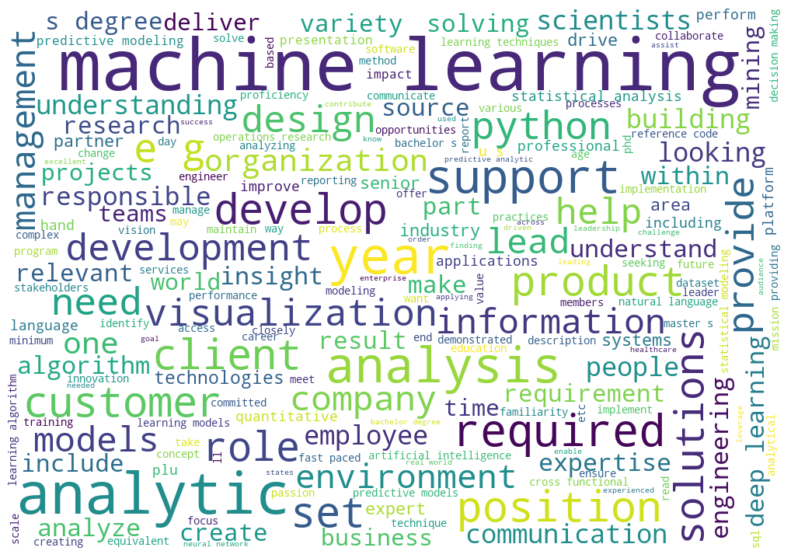

In [29]:
stopwords.update(['experience', 'following', 'candidates', 'big', 'background','developing', 'characteristics', 'data', 'team', 'data', 'scientist', 'strong', 'project', 
                  'solution', 'technology', 'science', 'model', 'knowledge','skill', 'work', 'build', 'will', 'knowledge', 'application','gender', 'identity', 'equal',
                  'opportunity','related','field', 'without', 'regard', 'national', 'origin', 'religion', 'sex', 'race', 'color', 'veteran', 'status','sexual',
                  'orientation','opportunity', 'employer', 'qualified','applicant','skills', 'job', 'summary', 'advanced', 'system', 'applicants', 'receive', 'large', 'best', 'practice', 'problem'
                 , 'processing', 'affirmative', 'action', 'employment', 'consideration', 'receive', 'united', 'state', 'programming', 'computer', 'working', 'saying', 
                  'preferred', 'qualification', 'disability', 'protected', 'structured', 'unstructured', 'problems', 'technical', 'internal', 'external', 'non',
                 'subject', 'matter', 'please', 'apply', 'using', 'dental', 'reasonable', 'accomodation', 'join', 'us', 'tools', 'individuals', 'disabilities'
                 , 'type', 'full', 'wide', 'range', 'duties', 'responsibilities', 'stakeholder', 'oral', 'written', 'ideal', 'candidate', 'ability', 'qualifications', 'well',
                  'must', 'able', 'unit', 'member', 'posted', 'today', 'service', 'clearance', 'days', 'ago', 'high', 'quality', 'level', 'every', 'use', 'case', 'additional'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                     width=1000, height=700).generate(aggregate_descriptions)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Very interesting! Even though before we focused on the technical skills, we can see that they make up a minority in the actual job description. Technologies like python, SQL and machine learning are still visible but many other skills are required, such as: decision making, attention to detail, read people and many more.

In [31]:
states = usa_jobs.inferred_state.unique()
sum_in_states = []
for state in states:
    total_jobs_state = len(usa_jobs[usa_jobs['inferred_state']==state])
    sum_in_states.append(int(total_jobs_state))
jobs_in_states = {'state':states, 'Total jobs':sum_in_states}
jobs_in_states = pd.DataFrame(jobs_in_states)
jobs_in_states = jobs_in_states.sort_values(by='Total jobs', ascending=False)
jobs_in_states = jobs_in_states.reset_index(drop=True)
jobs_in_states = jobs_in_states.drop(jobs_in_states.index[len(jobs_in_states)-1])
jobs_in_states[:10]

,state,Total jobs
0,California,1954
1,New york,805
2,Virginia,665
3,Texas,649
4,Massachusetts,541
5,Illinois,518
6,Pennsylvania,446
7,Washington,428
8,New jersey,359
9,Florida,294


Above we can see the top 10 states with the most jobs. Let's see them plotted on the US map as well!

In [32]:
latitude = [32.318231,35.20105,34.048928,36.778261,39.550051,41.603221,
38.905985,38.910832,27.664827,32.157435,19.898682,41.878003,44.068202,
40.633125,40.551217,39.011902,37.839333,31.244823,42.407211,39.045755,
45.253783,44.314844,46.729553,37.964253,32.354668,46.879682,35.759573,
47.551493,41.492537,43.193852,40.058324,34.97273,38.80261,43.299428,
40.417287,35.007752,43.804133,41.203322,41.580095,33.836081,43.969515,
35.517491,31.968599,39.32098,37.431573,44.558803,47.751074,43.78444,
38.597626,43.075968, 38.895]
longitude = [-86.902298,-91.831833,-111.093731,-119.417932,-105.782067,
-73.087749,-77.033418,-75.52767,-81.515754,-82.907123,-155.665857,-93.097702,
-114.742041,-89.398528,-85.602364,-98.484246,-84.270018,-92.145024,-71.382437,
-76.641271,-69.445469,-85.602364,-94.6859,-91.831833,-89.398528,-110.362566,
-79.0193,-101.002012,-99.901813,-71.572395,-74.405661,-105.032363,-116.419389,
-74.217933,-82.907123,-97.092877,-120.554201,-77.194525,-71.477429,-81.163725,
-99.901813,-86.580447,-99.901813,-111.093731,-78.656894,-72.577841,-120.740139,
-88.787868,-80.454903,-107.290284, -77.0366]
state_names = ['Alabama','Arkansas','Arizona','California','Colorado','Connecticut',
'District of columbia','Delaware','Florida','Georgia','Hawaii','Iowa',
'Idaho','Illinois','Indiana','Kansas','Kentucky','Louisiana','Massachusetts',
'Maryland','Maine','Michigan','Minnesota','Missouri','Mississippi',
'Montana','North carolina','North dakota','Nebraska','New hampshire',
'New jersey','New mexico','Nevada','New york','Ohio','Oklahoma','Oregon',
'Pennsylvania','Rhode island','South carolina','South dakota','Tennessee',
'Texas','Utah','Virginia','Vermont','Washington','Wisconsin','West virginia',
'Wyoming', 'Washington d.c.']
state_dict = {'state':state_names, 'latitude':latitude, 'longitude':longitude}
state_df = pd.DataFrame(state_dict, columns=['state', 'latitude', 'longitude'])
state_coords = pd.merge(state_df, jobs_in_states, how='right', on='state')
state_coords = state_coords.sort_values(by='Total jobs', ascending=False)
state_coords = state_coords.reset_index(drop=True)

In [55]:
fig = px.scatter_geo(data_frame=state_coords, lat='latitude', scope='north america', hover_name='state',
                    lon='longitude', size='Total jobs', projection='hammer')
fig.sho()

In [41]:
month_of_posting = []
for i in range(len(usa_jobs)):
    month_of_posting.append(usa_jobs['crawl_timestamp'][i].month)
usa_jobs['month'] = month_of_posting
months = [x for x in range(2, 11)]
sum_in_months = []
for month in months:
    total_jobs_in_month = len(usa_jobs[usa_jobs['month']==month])
    sum_in_months.append(total_jobs_in_month)
jobs_in_months = {'month':months, 'Total jobs':sum_in_months}
jobs_in_months = pd.DataFrame(jobs_in_months)
#dropping the last month of october, because it is not fully included in this set
jobs_in_months = jobs_in_months.drop([8])
monthmap = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
jobs_in_months['month'] = jobs_in_months['month'].map(monthmap)
jobs_in_months

,month,Total jobs
0,February,844
1,March,554
2,April,841
3,May,656
4,June,789
5,July,1837
6,August,2783
7,September,1662


In [51]:
months_plot = go.Figure()
months_plot.add_trace(go.Scatter(x=jobs_in_months.month, 
                                y=jobs_in_months['Total jobs'],
                                hovertemplate=
                                '<b>Month</b>: %{x}<br>'+
                                '<b>Number of Jobs</b>: %{y}'))
months_plot.update_layout(title='US job posts in Data science by month in 2019',
                         xaxis_title='Month', yaxis_title='Amount of job posts')
months_plot.show()

Only months February to September are completely available, it's a pity that we do not have the entire year included in the data but we can still distinguish a strong rise in the summer months for employment offers.  
## The part below is still work-in-progress. Stay tuned!
Looking for years of relevant experience

In [59]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ankit/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [62]:
import re
from word2number import w2n
import statistics
def search_text_left_of_word(text, word, n):
    """Searches for a text and retrieves n words on left side of the text"""
    words = re.findall(r'\w+', text)
    try:
        index = words.index(word)
    except ValueError:
        return " "
    return words[index - n:index]
def search_year_word(text):
    return text.find('year')
def search_number_around_word(word_surroundings):          #this function adds all the numbers found to a list. It also converts the words to numbers, if it is the case
    word_surroundings = " ".join(word_surroundings)
    word_surroundings = word_tokenize(word_surroundings)
    pos_tags = nltk.pos_tag(word_surroundings)
    numbers_list = []
    for a in pos_tags:
        if a[1] in 'CD':
            if a[0].isalpha():       #sometimes the numbers are written as words, e.g. 'Three' instead of 3
                try:
                    numbers_list.append(w2n.word_to_num(a[0]))
                except ValueError:
                    return ""
            else:
                numbers_list.append(a[0])
    return numbers_list
years_experience_req = []

def convert_to_int(list_elem):
    try:
        converted_int = int(list_elem)
        if converted_int <= 10:
            return int(list_elem)
    except ValueError:
        return
for post_index in range (len(usa_jobs)):
    current_job = usa_jobs.job_description[post_index]
    word_surroundings = search_text_left_of_word(current_job, 'years', 2)
    if current_job.find(' year ') > -1:
        years_experience_req.append(['1'])
    years_experience_req.append(search_number_around_word(word_surroundings))
    #print(post_index, search_number_around_word(word_surroundings))
years_experience_req = [convert_to_int(item) for sublist in years_experience_req for item in sublist]
years_experience_req = [i for i in years_experience_req if i != None]
# print(years_experience_req)
# usa_jobs['years_experience_required'] = years_experience_req
print("An average of ", statistics.mean(years_experience_req), "  years is required in most job offerings. ")

An average of  4.014379571092103   years is required in most job offerings. 


In [57]:
#Just checking if the last 7's in the data actually correspond to 
usa_jobs.job_description[10]

"Read what people are saying about working here. \n\nAt Northrop Grumman, innovation isn't just an idea-it's a way of life. Our employees have incredible opportunities to work on revolutionary systems in air and space that impact lives around the world today, and for generations to come. Our work preserves freedom and democracy, and advances human discovery and our understanding of the universe. We look for people who have bold new ideas, courage and a pioneering spirit to join forces to invent the future.\n\nNorthrop Grumman is seeking a Data Scientist to become part of the organization supporting the Army Analytics Group's Research Facilitation Laboratory located in Monterey, California. The team conducts a variety of research studies and supports data analytics efforts for clients across the Army, Office of the Secretary of Defense and greater DoD, conducting high-quality research with practical real-world implications. The team works primarily within a data environment that houses 

In [19]:
statistics.mean([3, 4, None])

TypeError: can't convert type 'NoneType' to numerator/denominator